Angelina Shibu \
2001CS06

In [7]:
def load_dataset(file_path):
    with open(file_path, 'r') as file:
        data = file.read().split('\n\n')
    return data


In [8]:
lines = load_dataset("NER-Dataset-Train.txt")
print(lines[40])

@rishi_syd	O
hey	O
,	O
I'm	O
fine	O
!!	O
Thanx	O
:)	O
u	O
too	O
have	O
a	O
great	O
day	O
;)	O


In [18]:
tags = set()
data = []

for line in lines:
    words_tags = line.split('\n')
    words = []
    tokenized_words = []

    for word_tag in words_tags:
        if word_tag == '':
            continue
        words = word_tag.split('\t')
        tag = words[-1]
        word = words[0]
        tags.add(tag)
        tokenized_words.append((word, tag))

    data.append(tokenized_words)

In [19]:
tags = list(tags)
print(len(tags),tags)

3 ['I', 'O', 'B']


In [20]:
display(data[40])

[('@rishi_syd', 'O'),
 ('hey', 'O'),
 (',', 'O'),
 ("I'm", 'O'),
 ('fine', 'O'),
 ('!!', 'O'),
 ('Thanx', 'O'),
 (':)', 'O'),
 ('u', 'O'),
 ('too', 'O'),
 ('have', 'O'),
 ('a', 'O'),
 ('great', 'O'),
 ('day', 'O'),
 (';)', 'O')]

In [21]:
from models import BigramHMM, TrigramHMM

In [22]:
import numpy as np
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def k_fold_cross_validation(data, k, Model):
    kf = KFold(n_splits=k, shuffle=True)

    combined_actual_tags = []
    combined_predicted_tags = []

    for i, (train_index, test_index) in enumerate(kf.split(data)):
        train_data = [data[i] for i in train_index]
        test_data = [data[i] for i in test_index]

        model = Model(train_data, tags)
        model.train()
        
        predicted_tags = []
        actual_tags = []

        for sentence in test_data:
            words = [word for word, _ in sentence]
            tagged_words = model.viterbi(words)
            predicted_tags.extend([tag for _, tag in tagged_words])
            actual_tags.extend([tag for _, tag in sentence])

        predicted_tags = np.array(predicted_tags).flatten()
        actual_tags = np.array(actual_tags).flatten()

        print(f"Fold {i+1} results:")
        print(classification_report(actual_tags, predicted_tags))
        combined_actual_tags.extend(actual_tags)
        combined_predicted_tags.extend(predicted_tags)

    return combined_actual_tags, combined_predicted_tags

In [23]:
actual_tags, predicted_tags = k_fold_cross_validation(data, 5, BigramHMM)


Fold 1 results:
              precision    recall  f1-score   support

           B       0.79      0.18      0.30       121
           I       0.07      0.78      0.12        78
           O       0.99      0.78      0.88      3477

    accuracy                           0.76      3676
   macro avg       0.62      0.58      0.43      3676
weighted avg       0.97      0.76      0.84      3676

Fold 2 results:
              precision    recall  f1-score   support

           B       0.57      0.19      0.29       124
           I       0.06      0.77      0.11        73
           O       0.99      0.76      0.86      3302

    accuracy                           0.74      3499
   macro avg       0.54      0.57      0.42      3499
weighted avg       0.95      0.74      0.82      3499

Fold 3 results:
              precision    recall  f1-score   support

           B       0.83      0.18      0.30       131
           I       0.08      0.69      0.15       108
           O       0.98    

Overall results for bigram model:
              precision    recall  f1-score   support

           B       0.70      0.19      0.29       582
           I       0.07      0.74      0.12       390
           O       0.99      0.78      0.87     16508

    accuracy                           0.75     17480
   macro avg       0.58      0.57      0.43     17480
weighted avg       0.96      0.75      0.83     17480

Confusion Matrix:


<Axes: >

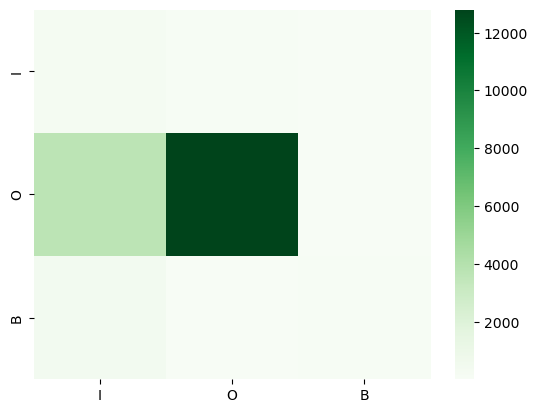

In [24]:
print("Overall results for bigram model:")
print(classification_report(actual_tags, predicted_tags))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(actual_tags, predicted_tags, labels=tags), cmap='Greens', xticklabels=tags, yticklabels=tags)

In [25]:
actual_tags, predicted_tags = k_fold_cross_validation(data, 5, TrigramHMM)

Fold 1 results:
              precision    recall  f1-score   support

           B       0.77      0.20      0.32       121
           I       0.06      0.84      0.11        98
           O       0.99      0.62      0.76      3257

    accuracy                           0.61      3476
   macro avg       0.61      0.55      0.40      3476
weighted avg       0.96      0.61      0.73      3476

Fold 2 results:
              precision    recall  f1-score   support

           B       0.67      0.14      0.23       114
           I       0.06      0.83      0.10        88
           O       0.99      0.64      0.78      3243

    accuracy                           0.63      3445
   macro avg       0.57      0.54      0.37      3445
weighted avg       0.95      0.63      0.74      3445

Fold 3 results:
              precision    recall  f1-score   support

           B       0.87      0.10      0.18       133
           I       0.05      0.91      0.09        76
           O       0.99    

Overall results for trigram model:
              precision    recall  f1-score   support

           B       0.76      0.16      0.26       582
           I       0.05      0.86      0.09       390
           O       0.99      0.63      0.77     16508

    accuracy                           0.62     17480
   macro avg       0.60      0.55      0.37     17480
weighted avg       0.96      0.62      0.74     17480

Confusion Matrix:


<Axes: >

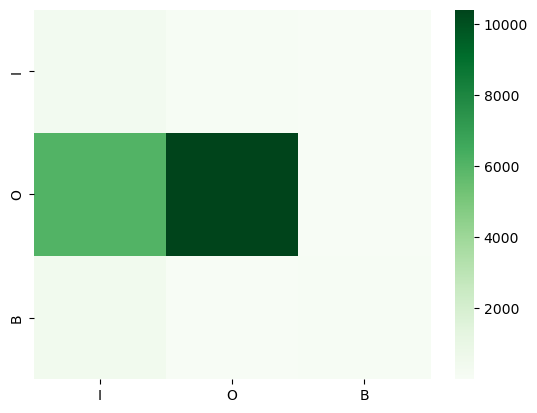

In [26]:
print("Overall results for trigram model:")
print(classification_report(actual_tags, predicted_tags))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(actual_tags, predicted_tags, labels=tags), cmap='Greens', xticklabels=tags, yticklabels=tags)